## Including Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Preprocessing

### reading the data 

In [3]:
kaggle_train_df = pd.read_csv("train.csv")
kaggle_test_df = pd.read_csv("test.csv")

# merging both train and test data for preprocessing
together_df = kaggle_train_df.append(kaggle_test_df)

<AxesSubplot:xlabel='x', ylabel='Target'>

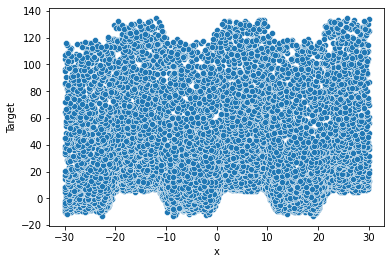

In [4]:
sns.scatterplot(x=together_df['x'], y=together_df['Target'])

<AxesSubplot:xlabel='y', ylabel='Target'>

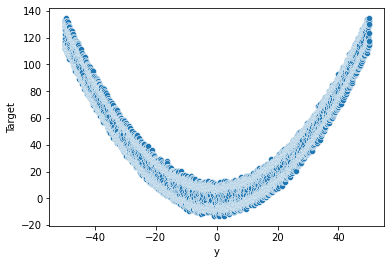

In [5]:
sns.scatterplot(x=together_df['y'], y=together_df['Target'])

In [6]:
together_df.head()

,ID,x,y,Target
0,0,14.800480,-50.000000,118.231729
1,1,2.391239,-49.989999,132.830129
2,2,-26.471647,-49.979998,115.094397
3,3,-7.911791,-49.969997,118.873317
4,4,-25.109511,-49.959996,116.147884


In [7]:
kaggle_train_df.shape, kaggle_test_df.shape, together_df.shape

((10000, 4), (5000, 3), (15000, 4))

In [8]:
together_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,15000.0,4.166167e+03,2763.946110,0.000000,1874.750000,3.749500e+03,6249.25000,9999.000000
x,15000.0,-1.055663e-15,17.323395,-30.000000,-15.000000,-1.749902e-15,15.00000,30.000000
y,15000.0,1.002055e-14,28.872325,-50.000000,-25.000000,3.549244e-15,25.00000,50.000000
Target,10000.0,4.168710e+01,38.121064,-13.107482,9.722632,3.220146e+01,71.01185,134.538654


- ### There are no nan values in kaggle train and test file's features.

In [9]:
def get_missing_data():
    Missing_Data = together_df.isnull().sum().sort_values()
    Missing_Data_precentage = ((together_df.isnull().sum()/together_df.isnull().count())*100).sort_values()
    return pd.concat([Missing_Data, Missing_Data_precentage], axis=1, keys=['Missing_Data', 'Percentage'])

get_missing_data()

,Missing_Data,Percentage
ID,0,0.000000
x,0,0.000000
y,0,0.000000
Target,5000,33.333333


 ### Checking for duplicate rows :-

        There are no duplicate rows in the dataset.

In [10]:
together_df.duplicated().sum()

0

### There are no outliers in the data.

<AxesSubplot:ylabel='x'>

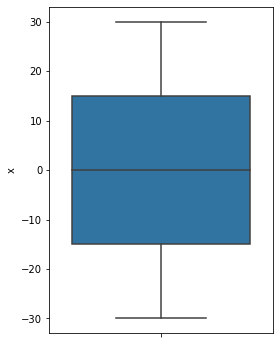

In [11]:
plt.figure(figsize=(4,6))
sns.boxplot(y='x', data=together_df)

<AxesSubplot:ylabel='y'>

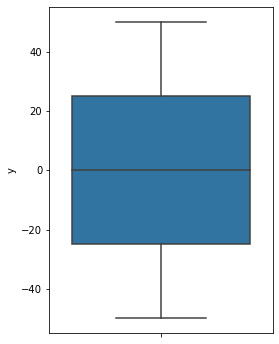

In [12]:
plt.figure(figsize=(4,6))
sns.boxplot(y='y', data=together_df)

### Splitting kaggle train and test data from together_df.

In [13]:
train_df = together_df.loc[together_df["Target"].isna() == False,:]
test_df = together_df.loc[together_df["Target"].isna(),:].drop(columns="Target")

In [14]:
train_df.shape, test_df.shape

((10000, 4), (5000, 3))

In [15]:
train_df.drop(columns="ID", inplace=True)
train_df.head()

,x,y,Target
0,14.800480,-50.000000,118.231729
1,2.391239,-49.989999,132.830129
2,-26.471647,-49.979998,115.094397
3,-7.911791,-49.969997,118.873317
4,-25.109511,-49.959996,116.147884


In [16]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,10000.0,-1.720224e-15,17.323106,-30.000000,-15.000000,-1.749902e-15,15.00000,30.000000
y,10000.0,4.494183e-15,28.871844,-50.000000,-25.000000,3.549244e-15,25.00000,50.000000
Target,10000.0,4.168710e+01,38.121064,-13.107482,9.722632,3.220146e+01,71.01185,134.538654


### Correlation :-

In [17]:
correlation_matrix = abs(train_df.corr())
correlation_target = correlation_matrix["Target"]
correlation_target

x         0.063020
y         0.000658
Target    1.000000
Name: Target, dtype: float64

Making Correlation Matrix Heat Map :-

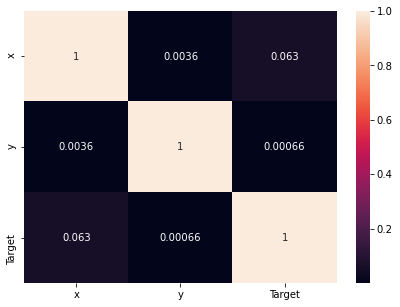

In [18]:
columns = train_df.columns
plt.figure(figsize=(7,5))
plt.title = "Correlation Matrix"
sns.heatmap(abs(train_df[columns].corr()), annot=True)
plt.show()

## Splitting the data

In [19]:
main_X = train_df.drop(columns="Target").to_numpy().astype("float")
main_y = train_df["Target"].to_numpy().astype("float")

from sklearn import preprocessing
scaler_ss = preprocessing.StandardScaler()
main_X_scaled = scaler_ss.fit_transform(main_X)

In [20]:
# poly = PolynomialFeatures(degree=25)
# X_multi_trans = poly.fit_transform(main_X_scaled)

train_X, test_X, train_y, test_y = model_selection.train_test_split(main_X_scaled, main_y, train_size=0.8, random_state=43)

## Linear Regression Model

- following code was to check for which random state the error was least.

In [21]:
# least_mean_error = 0
# random_best = 0
# for i in range(100):
#     train_X, test_X, train_y, test_y = model_selection.train_test_split(X_multi_trans, main_y, train_size=0.8, random_state=i)
#     model = LinearRegression()
#     model.fit(train_X, train_y)
#     predictions = model.predict(test_X)
#     if i ==0:
#         least_mean_error =  metrics.mean_squared_error(test_y, predictions)
#         random_best = 0
#     if i != 0 :
#         if(metrics.mean_squared_error(test_y,predictions)< least_mean_error):
#             least_mean_error = metrics.mean_squared_error(test_y, predictions)
#             random_best = i

In [22]:
# least_mean_error, random_best

In [23]:
# model = LinearRegression()
# model.fit(train_X, train_y)
# X_test_predictions = model.predict(test_X)

In [24]:
# metrics.mean_squared_error(test_y, X_test_predictions)

## SVM

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#SVM CLASSIFIER :-

# SVC_param = {'kernel' : ['rbf'], 'C' : [1]}
# SVC_optimal_param = GridSearchCV(SVR(), SVC_param, cv=None)
# SVC_optimal_param.fit(train_X, train_y)

# y_pred = SVC_optimal_param.predict(test_X)

# print("The best parameters are :- ",SVC_optimal_param.best_params_)

regr = SVR()
regr.fit(train_X, train_y)
y_pred = regr.predict(test_X)

In [26]:
metrics.mean_squared_error(test_y, y_pred)

66.86264134097581

## Preparing the submission

In [27]:
kaggle_test_X = test_df.drop(columns="ID").to_numpy().astype("float")

In [28]:
from sklearn import preprocessing
scaler_ss = preprocessing.StandardScaler()
kaggle_test_X_scaled = scaler_ss.fit_transform(kaggle_test_X)

In [29]:
# poly = PolynomialFeatures(degree=25)
# kaggle_test_X_multi_trans = poly.fit_transform(kaggle_test_X_scaled)

In [30]:
regr.fit(main_X_scaled, main_y)

SVR()

In [31]:
preds = regr.predict(kaggle_test_X_scaled)
test_df["Target"] = preds 
to_submit = test_df[["ID", "Target"]]
to_submit.to_csv("submission.csv", index=False)